<a href="https://colab.research.google.com/github/anammagalhaes/Predicao-da-qualidade-de-vinho-/blob/main/Predi%C3%A7%C3%A3o_da_qualidade_do_vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Wine Data Set
Download: Data Folder, Data Set Description


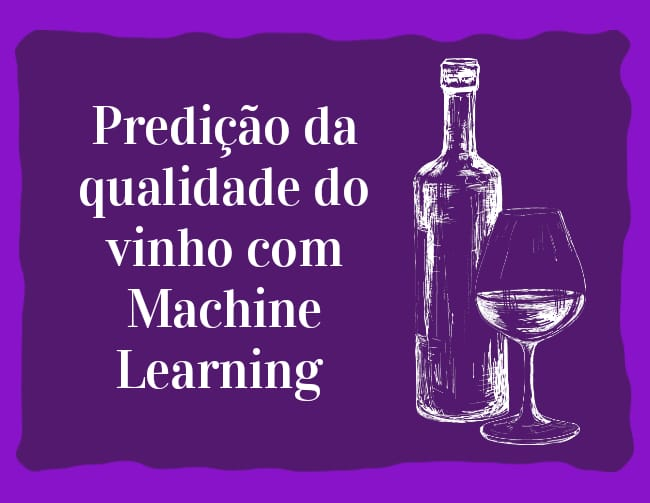

In [ ]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# definir o estilo do seaborn para os plots
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [ ]:
# imprimindo as cinco primeiras entradas do dataframe
df.head()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **ATENÇÃO, PRECISO PADRONIZAR (STANDARTSCALE) PRIMEIRO PORQUE VISIVELMENTE ALCOHOL E MALIC ACID ESTÃO EM ESCALAS DIFERENTES**

In [ ]:
# dimensão ou formato do dataframe 

print("Dimensão do DataFrame")
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))


Dimensão do DataFrame
Entradas:	178
Variáveis:	14


In [ ]:
# tipos de variáveis 

print("Tipos de variáveis:")
df.dtypes

Tipos de variáveis:


Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [ ]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [ ]:
# valores ausentes 

print("\nValores ausentes")
n = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
df_n = pd.DataFrame(n)
df_n.style.format(" {:.2%}")



Valores ausentes


,0
Proline,0.00%
OD,0.00%
Hue,0.00%
Color.int,0.00%
Proanth,0.00%
Nonflavanoid.phenols,0.00%
Flavanoids,0.00%
Phenols,0.00%
Mg,0.00%
Acl,0.00%


In [ ]:
# valores únicos 

print("\nValores únicos")
print(df.nunique().sort_values())



Valores únicos
Wine                      3
Nonflavanoid.phenols     39
Mg                       53
Acl                      63
Hue                      78
Ash                      79
Phenols                  97
Proanth                 101
Proline                 121
OD                      122
Alcohol                 126
Flavanoids              132
Color.int               132
Malic.acid              133
dtype: int64


Wine vai ser a variável alvo, categórica, em 3 clases. 

In [ ]:
df.columns

NameError: ignored

In [ ]:
# resumo estatístico 

df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Sendo,

count - Contagem de valor de variáveis
mean - Média dos valores da variável
std - Desvio padrão
min - Valor mínimo presente na coluna
25% - 25% dos valores presentes na coluna
50% - 50% dos valores presentes na coluna (mediana)
75% - 75% dos valores presentes na coluna
max - Valor máximo presente na coluna


desvio padrão de prolina é meio grande 

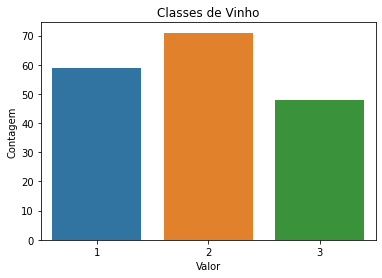

Proporção entre as classes de vinhos
2    0.398876
1    0.331461
3    0.269663
Name: Wine, dtype: float64


In [ ]:
# Proporção entre as classes de vinho 

fig, ax = plt.subplots()
sns.countplot('Wine', data=df, ax=ax)
ax.set_title("Classes de Vinho")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show(),

print("Proporção entre as classes de vinhos")
print(df['Wine'].value_counts()/df.shape[0])


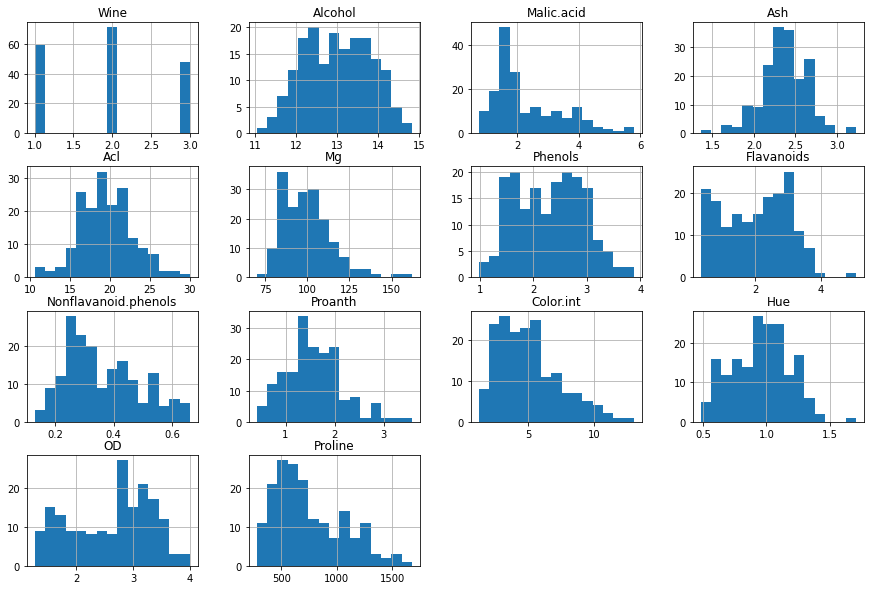

In [ ]:
# Plotar o histograma das variáveis numéricas (ver o tipo de distribuição das variáveis)
df.hist(bins=15, figsize=(15,10));

## **PRECISA VER OS OUTLIERS DIREITINHO ANTES, CALCULAR PELO INTERVALO ENTRE OS 25 E 75%**

Proline:valores acima de 1300:
9 entradas
5.0562%


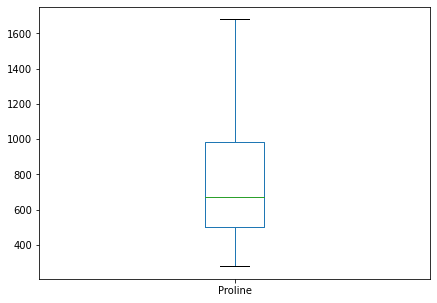

In [ ]:
#Proline está com desvio padrão alto, investigar outliers 

df.Proline.plot(kind='box', vert=True, figsize=(7,5))

# Ver a quantidade de valores acima de 1300 
print("Proline:valores acima de 1300:")
print("{} entradas".format(len(df[df.Proline>1300])))
print("{:.4f}%".format((len(df[df.Proline > 1300]) / df.shape[0])*100))

Assim, vamos fazer uma limpeza para retirada dos outliers.


In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Proline > 1300].index, axis=0, inplace=True)

print('Quantidade de entradas após limpeza{}'.format(df_clean.shape[0]))
reduzido = (df_clean.shape[0] / df.shape[0]) -1
print('Ou seja, foram retirados {:.2%} de dados na limpeza do dataset'.format(reduzido * (-1)))

Quantidade de entradas após limpeza169
Ou seja, foram retirados 5.06% de dados na limpeza do dataset


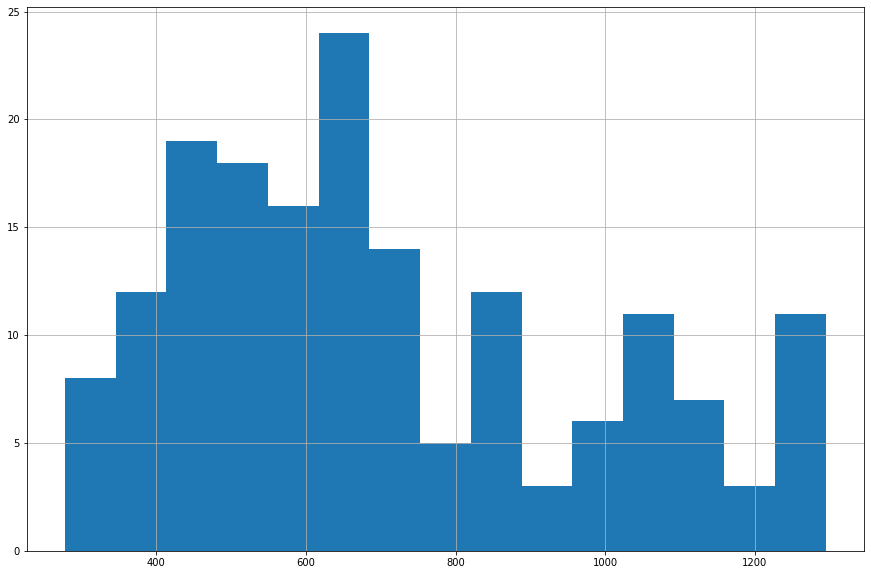

In [ ]:
# plotar o histograma para as variáveis numéricas 
df_clean.Proline.hist(bins=15, figsize=(15,10));

Qual a correlação entre as variáveis? 

A correlação é feita a partir do coeficiente de correlação entre duas variáveis e da intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse. Para isso, podem ser feitos:

    Uma matriz de correlação,
    Um heatmap dessa matriz, usando a biblioteca seaborn.


In [ ]:
# criar uma matriz de correlação entre as variáveis 

corr = df_clean.corr()

display(corr)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.271181,0.427785,-0.025670,0.492885,-0.186683,-0.699468,-0.837452,0.477067,-0.482564,0.339618,-0.604422,-0.792855,-0.598522
Alcohol,-0.271181,1.000000,0.130280,0.199653,-0.263182,0.251225,0.216227,0.164382,-0.124814,0.083112,0.523983,-0.129247,0.037134,0.606643
Malic.acid,0.427785,0.130280,1.000000,0.176791,0.276175,-0.043791,-0.323462,-0.401003,0.285341,-0.211632,0.278198,-0.558664,-0.362739,-0.161481
Ash,-0.025670,0.199653,0.176791,1.000000,0.480649,0.275538,0.108582,0.098233,0.196117,0.005526,0.247666,-0.094783,-0.006148,0.215227
Acl,0.492885,-0.263182,0.276175,0.480649,1.000000,-0.065148,-0.275753,-0.310197,0.353348,-0.156631,0.064787,-0.247867,-0.261808,-0.399535
Mg,-0.186683,0.251225,-0.043791,0.275538,-0.065148,1.000000,0.184392,0.170932,-0.250985,0.230343,0.179959,0.039318,0.051830,0.397183
Phenols,-0.699468,0.216227,-0.323462,0.108582,-0.275753,0.184392,1.000000,0.854587,-0.438740,0.600640,-0.129344,0.420690,0.703032,0.418272
Flavanoids,-0.837452,0.164382,-0.401003,0.098233,-0.310197,0.170932,0.854587,1.000000,-0.529153,0.641795,-0.249239,0.528226,0.794784,0.416946
Nonflavanoid.phenols,0.477067,-0.124814,0.285341,0.196117,0.353348,-0.250985,-0.438740,-0.529153,1.000000,-0.351269,0.169936,-0.249266,-0.495295,-0.286684
Proanth,-0.482564,0.083112,-0.211632,0.005526,-0.156631,0.230343,0.600640,0.641795,-0.351269,1.000000,-0.063045,0.279427,0.513154,0.281081


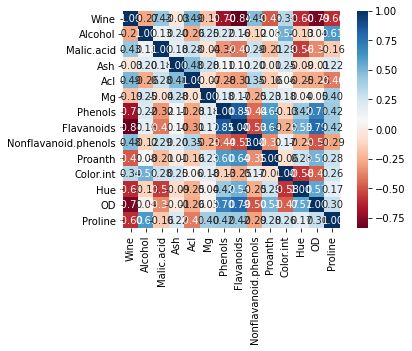

In [ ]:
# Criar um heatmap com seaborn 


sns.heatmap(corr,cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## **aumentar essa figura **

## Preparação dos dados para modelo de machine learning 

Como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, vou usar o StardardScaler, que vem junto com sklearn.preprocessing. Esta ferramenta é extremamente útil para padronizar os dados numéricos.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# separar as variáveis independentes da variável alvo 

X = df_clean.drop(['Alcohol', 'Phenols','Flavanoids', 'Proline', 'Color.int', 'Mg'], axis=1) #estas são as variáveis independentes que alimentarão o modelo. 

y = df_clean['Wine'] # variável alvo, que é a categórica 

# padronizar as colunas numéricas 
X = StandardScaler().fit_transform(X)

#  padronizar os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) # porque teve exemplos que fizeram com dados de treino e outros com X inteiro? a variael alvo nao padroniza? 


# dividir o dataset entre treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Treinamento do modelo de Machine Learning para classificar os vinhos de acordo com suas características 

Será utilizado o algoritmo Random Forest. Este algoritmo é bastante usual, pois emprega métodos ensemble, e cria uma combinação de várias árvores de decisão - uma "floresta" realmente - verificando qual combinação apresenta melhor desempenho e acurácia. Além disso, Random Forest possui vantagens devido à sua flexibilidade e facilidade de uso (uma vez que funciona muito bem mesmo sem o ajuste nos hiperparâmetros).


Para tanto, será utilizada a biblioteca Scikit-Learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinando o modelo # instanciando o modelo de Random Forest
ml_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                  random_state = 42)
ml_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Desempenho do modelo 


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
y_pred = ml_model.predict(X_test)

# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred) )

[Acurácia] Random Forest: 0.9803921568627451

[Classification Report] Random Forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      0.94      0.97        18

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



Para decidirmos que métrica usar, precisamos analisar algumas de nossas opções.

    Caso optemos pela Acurácia, precisamos estar cientes que esse pode não ser o método ideal, mas para uma análise inicial do problema, pode nos ajudar a criar uma solução generalista.

    Caso optemos por otimizar o modelo a partir do Recall, estamos priorizando que não haja Falsos Negativos. Ou seja, é preferível negar um cliente que não traria prejuízo à empresa, do que aceitar um que traga. Essa é a forma que são tratados, por exemplo, fraudes em cartão de crédito, modelos médicos, etc.

    Caso optemos por otimizar a partir do Precision, essencialmente, estamos dizendo que Falsos Positivos são ok, e não queremos ter Falsos Negativos. Basicamente, é preferível aceitar clientes que possam trazer prejuízo, do que deixar de aceitar clientes que não trarão. Essa é a forma que são tratados, por exemplo, modelos para spam de e-mails.

Aqui, vamos utilizar a Acurácia, no intuito de realizar uma análise generalista, deixando o fine-tuning de métricas e modelos para o talento dos alunos.

O que vai definir a melhor métrica é a estratégia de negócio da empresa, e seus valores. Também por isso, vamos utilizar essa métrica mais "genérica".

Dito isso, mãos à obra!

Como você pode confirmar, o modelo classificatório Random Forest foi capaz de atingir uma acurácia superior a 98% e lidou muito bem com ambas as classes.

In [ ]:
# plotar a matriz de confusão para avaliar falsos positivos e falsos negativos

# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test, y_pred))
            

,0,1,2
0,17,0,0
1,0,16,0
2,0,1,17


Teve um falso positivo. 

## Testando novos modelos 

* Random Forest Classifier (Baseline - o que eu já fiz)
* Decision Tree Classifier
* SGD Classifier
* SVC
* Logistic Regression
* XGB Classifier
* LGBM Classifier


In [ ]:
# separar as variáveis independentes da variável alvo
X = df.drop('Wine', axis=1).select_dtypes(exclude='object')
y = df['Wine']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# construindo função de avaliação do baseline
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy')

    if quite == False:
        print("Acurácia: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Acurácia: 0.9680 (+/- 0.03)


Baseline será o RandomForestClassifier e os outros modelos serão desenvolvidos a fim de comparação. A métrica de performance será a acurácia. 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
acc = [] 

In [ ]:
# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    acc.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=acc, index=model, columns=['acc'])

,acc
RandomForestClassifier,0.968000
DecisionTreeClassifier,0.919000
SGDClassifier,0.992000
SVC,0.967667
LogisticRegression,0.984000
XGBClassifier,0.951667
LGBMClassifier,0.959667


In [ ]:
# instanciando um modelo de SGDClassifier.

sg = sgdc( )